# BooksNN - Characterize Individual Series

So far we've dealt with the mean of the data, which we have found is highly seasonal and can be predicted just by extrapolating the linear trend and seasonality. However, there is large variation between individual book series. We need to come up with some metrics for individual series, to see for which ones this simplistic approach holds.

**Goal:** For a series, generate all the labels that are currently in the spreadsheet. 
These include: 
* H/M/L seasonality
* popular/unpopular
* Downward/upward trend


Ideas: 
* Simple is best - quantify % price difference between high and low points of the season. 
* Popular: in last year dipped below 1k salesrank, unpopular: in last year was above 1M and never below 500k
* downward/upward trend: just use linear fit
* does statsmodels seasonal have some kind of quality of fit indicator? Can it extrapolate a trend by itself?
* use k-means and see how many clusters there are, and what ends up in them. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyisbn #module for converting ISBN-13 to ISBN-10 and vice versa
import booksnn as bnn

In [14]:
# GET DATA
asins_in_db = bnn.get_asin_list()
print('Total number of ASINs in database: ' + str(len(asins_in_db)))
asins = asins_in_db[0:50] #select a subset if desired
print('Total number of ASINs selected: ' + str(len(asins))+'\n')

#startdate = '2016-01-01'
#enddate = '2020-05-10'
#df = bnn.dicts_to_dataframe(bnn.get_usedprice(asins),startdate,enddate)

dict_df = bnn.get_usedprice(asins)

#dict_df = bnn.get_multiseries(asins,True)


Total number of ASINs in database: 577
Total number of ASINs selected: 50



,mean,std,std/mean
Datetime,,,
2014,201.238710,19.560321,0.097200
2015,139.006578,22.274038,0.160237
2016,96.242356,19.749577,0.205207
2017,94.109577,34.227901,0.363703
2018,92.477316,40.946620,0.442775
2019,47.822442,28.875995,0.603817
2020,14.526220,2.760806,0.190057

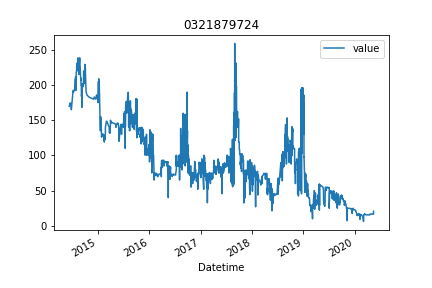

possibly seasonal


,mean,std,std/mean
Datetime,,,
2011,83.125238,30.567051,0.367723
2012,82.454848,11.297427,0.137013
2013,89.373000,21.239534,0.237650
2014,82.557400,31.629289,0.383119
2015,84.410847,38.221378,0.452802
2016,66.331653,13.415950,0.202256
2017,70.021557,15.485755,0.221157
2018,73.707996,7.134112,0.096789
2019,79.476883,6.926463,0.087151

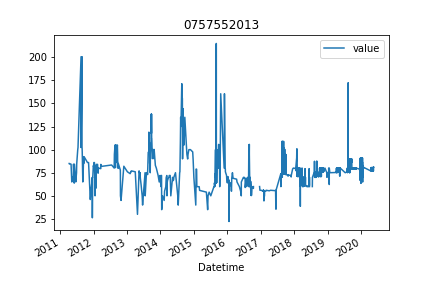

,mean,std,std/mean
Datetime,,,
2015,106.679325,17.949611,0.168258
2016,87.586341,31.310977,0.357487
2017,95.376366,19.590017,0.205397
2018,49.958199,17.031934,0.340924
2019,27.398678,9.540551,0.348212
2020,21.282754,3.164351,0.148681

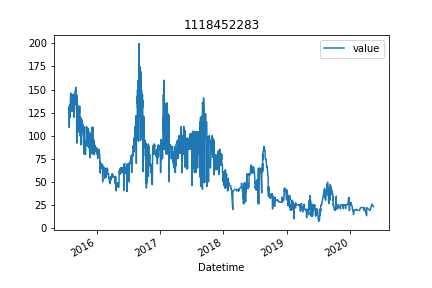

possibly seasonal


,mean,std,std/mean
Datetime,,,
2015,163.442692,16.301583,0.099739
2016,133.868692,18.497385,0.138176
2017,100.381911,23.942910,0.238518
2018,74.807901,13.254298,0.177178
2019,53.761893,12.196325,0.226858
2020,40.494226,5.672159,0.140073

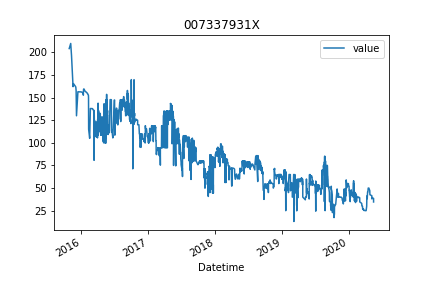

possibly seasonal


,mean,std,std/mean
Datetime,,,
2011,82.547143,9.823145,0.119000
2012,70.170360,17.236865,0.245643
2013,65.704503,12.917286,0.196597
2014,66.364767,12.342703,0.185983
2015,72.624185,12.630426,0.173915
2016,63.645259,17.521610,0.275301
2017,55.958807,20.963433,0.374623
2018,46.303349,15.724584,0.339599
2019,59.241014,18.623611,0.314370

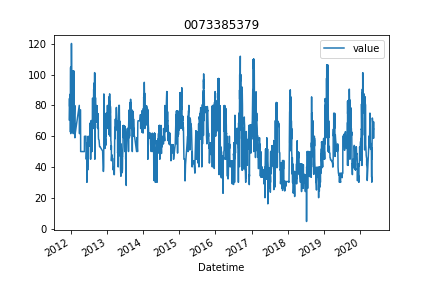

possibly seasonal


,mean,std,std/mean
Datetime,,,
2015,234.571002,23.856034,0.101701
2016,180.425171,18.985817,0.105228
2017,119.472098,21.309096,0.178360
2018,95.136392,23.694551,0.249059
2019,78.494877,15.412943,0.196356
2020,67.666991,9.182794,0.135706

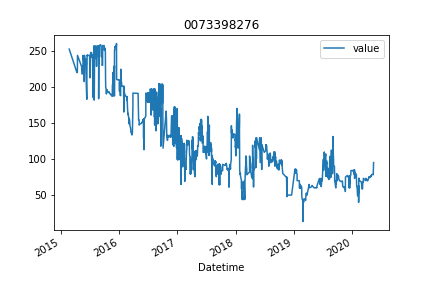

possibly seasonal


,mean,std,std/mean
Datetime,,,
2012,52.989241,9.014208,0.170114
2013,55.135223,14.627018,0.265294
2014,67.789141,20.157544,0.297357
2015,55.402118,21.720676,0.392055
2016,49.721864,23.647689,0.475599
2017,36.705035,9.593967,0.261380
2018,49.518098,16.844899,0.340177
2019,59.378009,20.409645,0.343724
2020,73.081474,13.444374,0.183964

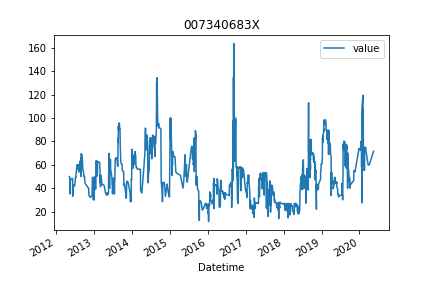

possibly seasonal


,mean,std,std/mean
Datetime,,,
2013,40.592444,8.275472,0.203867
2014,31.120714,26.995820,0.867455
2015,64.649167,24.987181,0.386504
2016,72.648444,21.051636,0.289774
2017,65.742860,29.033647,0.441624
2018,37.591732,12.179889,0.324004
2019,35.102275,11.361092,0.323657
2020,55.042774,12.424871,0.225731

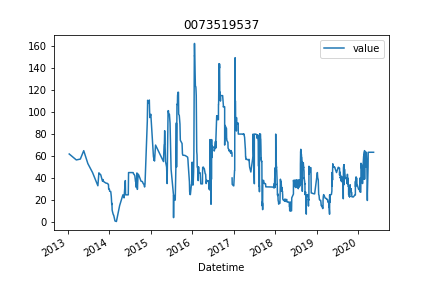

possibly seasonal


,mean,std,std/mean
Datetime,,,
2014,162.063400,19.768952,0.121983
2015,173.150968,22.574574,0.130375
2016,160.338911,22.388782,0.139634
2017,138.039284,23.186453,0.167970
2018,123.254278,26.342502,0.213725
2019,95.747196,28.880714,0.301635
2020,79.492866,16.998101,0.213832

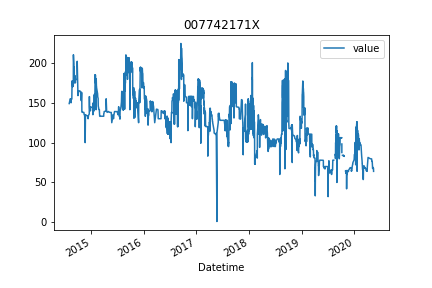

possibly seasonal


,mean,std,std/mean
Datetime,,,
2016,172.877264,36.458244,0.210891
2017,104.767966,14.613987,0.139489
2018,119.566478,20.725223,0.173336
2019,96.572029,15.248644,0.157899
2020,68.971333,7.583522,0.109952

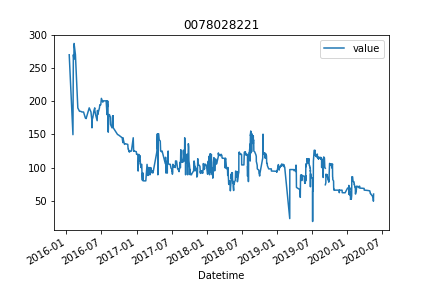

,mean,std,std/mean
Datetime,,,
2013,169.044862,22.490564,0.133045
2014,142.484977,15.527854,0.108979
2015,123.483636,15.412128,0.124811
2016,88.916380,18.942041,0.213032
2017,80.469317,14.014702,0.174162
2018,72.199765,9.155932,0.126814
2019,67.103373,12.080483,0.180028
2020,46.781516,11.886121,0.254077

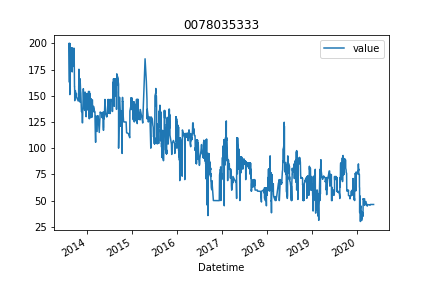

,mean,std,std/mean
Datetime,,,
2015,58.613262,12.511340,0.213456
2016,52.378318,15.898495,0.303532
2017,75.396229,30.882927,0.409608
2018,55.697027,32.341163,0.580662
2019,63.137047,15.786344,0.250033
2020,74.176977,14.729298,0.198570

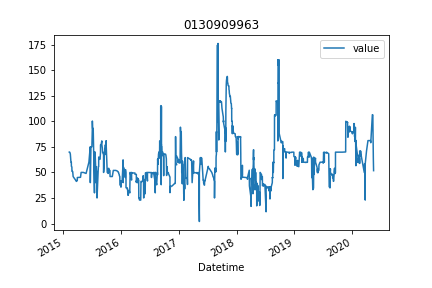

possibly seasonal


,mean,std,std/mean
Datetime,,,
2011,85.720982,16.663596,0.194393
2012,80.766683,15.658343,0.193871
2013,56.730304,11.903688,0.209829
2014,66.544590,18.704358,0.281080
2015,88.380457,16.186936,0.183151
2016,77.228167,15.608280,0.202106
2017,53.920543,11.458812,0.212513
2018,45.159155,13.346206,0.295537
2019,26.447127,7.449916,0.281691

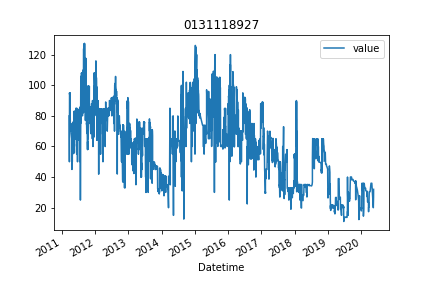

possibly seasonal


,mean,std,std/mean
Datetime,,,
2011,77.525769,8.681044,0.111976
2012,100.218615,16.487665,0.164517
2013,98.560530,15.946279,0.161792
2014,94.578950,20.930010,0.221297
2015,100.000507,21.500046,0.214999
2016,89.650634,22.192036,0.247539
2017,65.601619,16.936126,0.258166
2018,65.366470,23.587527,0.360851
2019,40.385094,13.133230,0.325200

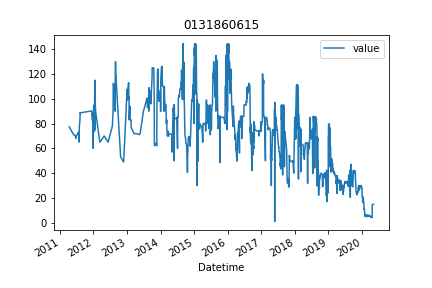

possibly seasonal


,mean,std,std/mean
Datetime,,,
2011,123.388706,26.029797,0.210958
2012,104.682011,10.783084,0.103008
2013,93.640124,13.766984,0.147020
2014,46.031202,23.795010,0.516932
2015,17.092362,7.568883,0.442823
2016,7.792450,4.972619,0.638133
2017,11.363700,7.086330,0.623594
2018,22.575014,15.987411,0.708191
2019,15.664118,9.244696,0.590183

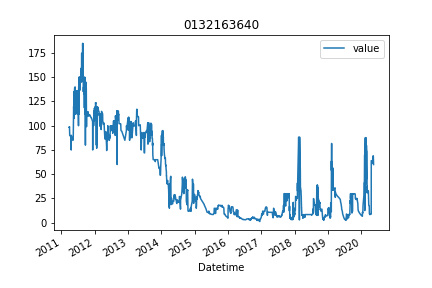

possibly seasonal


,mean,std,std/mean
Datetime,,,
2012,106.442500,3.108230,0.029201
2013,88.755918,10.397601,0.117148
2014,92.644127,22.502977,0.242897
2015,114.831268,12.755843,0.111083
2016,100.505625,22.630467,0.225166
2017,107.087894,15.542483,0.145138
2018,112.314846,20.360993,0.181285
2019,93.211844,14.965891,0.160558
2020,73.898683,17.612642,0.238335

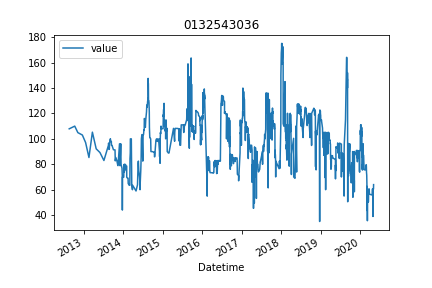

,mean,std,std/mean
Datetime,,,
2011,89.517647,13.922606,0.155529
2012,94.327059,9.996175,0.105974
2013,88.465846,12.262832,0.138617
2014,98.978142,17.513098,0.176939
2015,101.355468,9.304781,0.091803
2016,102.854832,12.151444,0.118142
2017,92.242806,15.395357,0.166900
2018,82.351773,14.471794,0.175731
2019,76.626495,9.731285,0.126996

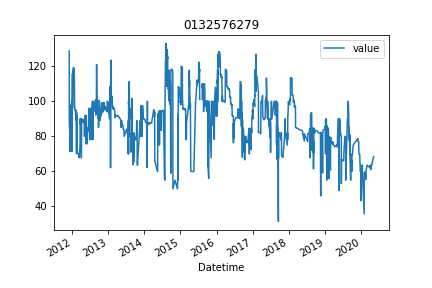

,mean,std,std/mean
Datetime,,,
2012,48.755726,5.559219,0.114022
2013,49.189259,4.069971,0.082741
2014,45.068978,5.901372,0.130941
2015,45.112124,4.040219,0.089559
2016,41.399282,8.043942,0.194301
2017,41.173740,8.527818,0.207118
2018,43.014760,8.666869,0.201486
2019,38.991726,11.760833,0.301624
2020,39.032032,14.373352,0.368245

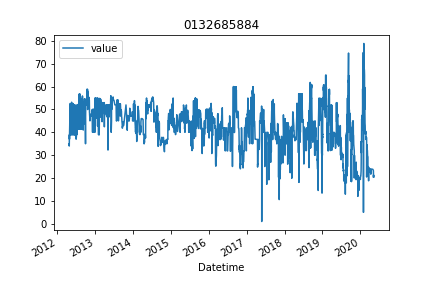

possibly seasonal


,mean,std,std/mean
Datetime,,,
2016,149.044025,10.992272,0.073752
2017,116.664241,18.424137,0.157924
2018,103.244816,11.895813,0.115219
2019,105.202516,11.151961,0.106005
2020,117.110794,36.140597,0.308602

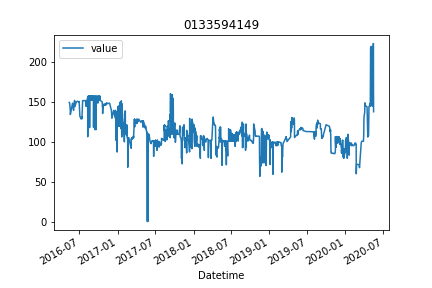

,mean,std,std/mean
Datetime,,,
2015,149.269403,15.469166,0.103633
2016,113.226719,17.715267,0.156458
2017,118.860024,30.366709,0.255483
2018,97.982172,13.864696,0.141502
2019,123.643040,12.670264,0.102475
2020,111.568797,11.070929,0.099230

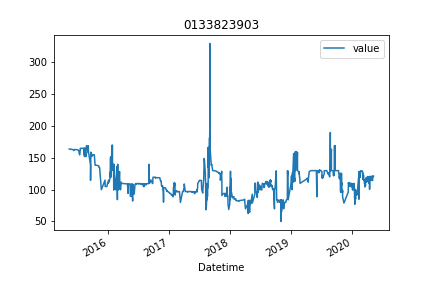

,mean,std,std/mean
Datetime,,,
2015,159.287890,17.586723,0.110408
2016,144.431790,22.007165,0.152371
2017,141.968373,7.694845,0.054201
2018,119.349016,22.256380,0.186481
2019,138.895887,27.582048,0.198581
2020,154.304515,14.019087,0.090853

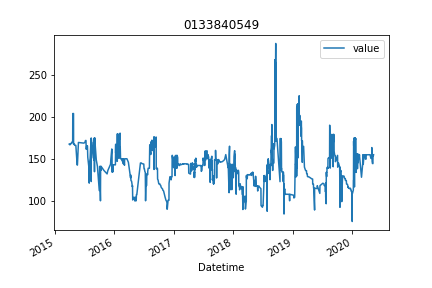

,mean,std,std/mean
Datetime,,,
2016,176.519733,28.234844,0.159953
2017,127.685176,19.342364,0.151485
2018,105.074068,22.114862,0.210469
2019,87.569725,15.687866,0.179147
2020,63.864345,13.876534,0.217281

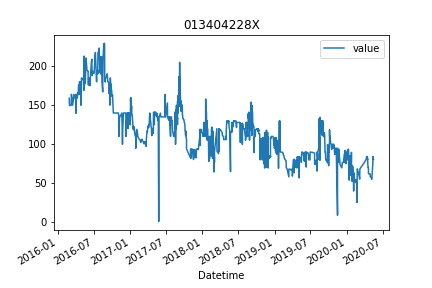

,mean,std,std/mean
Datetime,,,
2016,178.836206,24.738052,0.138328
2017,123.398503,19.350166,0.156810
2018,87.611388,32.097066,0.366357
2019,96.578700,32.702000,0.338605
2020,58.452450,12.837783,0.219628

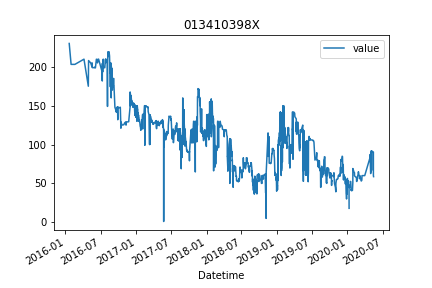

possibly seasonal


,mean,std,std/mean
Datetime,,,
2015,108.544000,1.690024,0.015570
2016,104.489884,16.353582,0.156509
2017,50.597643,19.082557,0.377143
2018,43.411639,13.499218,0.310958
2019,31.206044,12.417459,0.397918
2020,16.449301,4.597015,0.279466

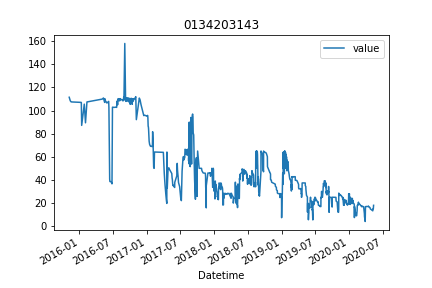

possibly seasonal


,mean,std,std/mean
Datetime,,,
2016,142.885175,16.390349,0.114710
2017,105.448853,11.575609,0.109775
2018,90.377442,11.544451,0.127736
2019,74.867060,8.626133,0.115219
2020,52.774817,5.545019,0.105069

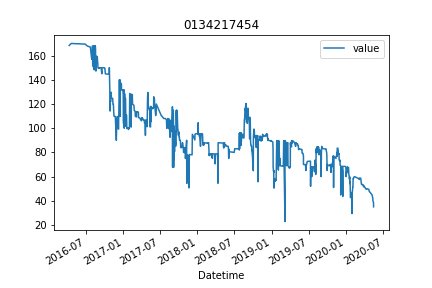

,mean,std,std/mean
Datetime,,,
2017,176.629970,11.653838,0.065979
2018,132.635045,18.678956,0.140830
2019,90.869162,14.781901,0.162672
2020,88.291290,13.048215,0.147786

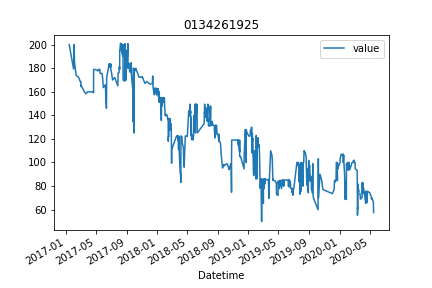

,mean,std,std/mean
Datetime,,,
2017,151.985440,30.774750,0.202485
2018,126.721730,15.074658,0.118959
2019,84.416257,19.427525,0.230140
2020,69.867970,10.472144,0.149885

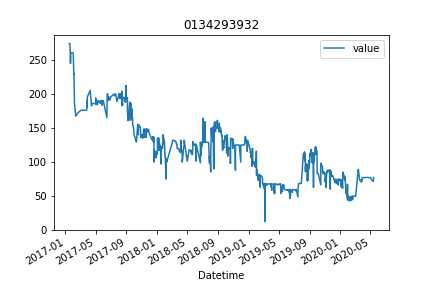

,mean,std,std/mean
Datetime,,,
2017,177.284856,22.791146,0.128557
2018,112.811715,18.167020,0.161038
2019,102.509825,22.488041,0.219374
2020,109.947278,19.073968,0.173483

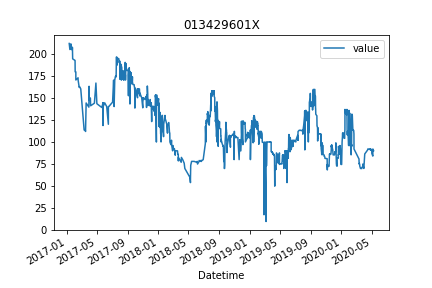

,mean,std,std/mean
Datetime,,,
2016,183.668590,6.737600,0.036683
2017,148.124810,28.162922,0.190130
2018,127.697966,25.949181,0.203207
2019,134.889189,34.967470,0.259231
2020,162.271883,17.918285,0.110421

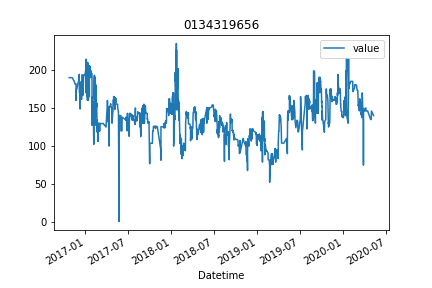

possibly seasonal


,mean,std,std/mean
Datetime,,,
2017,178.210984,170.468352,0.956554
2018,121.868563,13.577686,0.111413
2019,130.613103,15.414029,0.118013
2020,121.094000,8.521713,0.070373

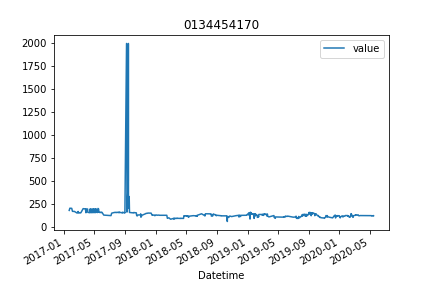

possibly seasonal


,mean,std,std/mean
Datetime,,,
2017,204.804745,24.362893,0.118957
2018,149.712598,41.502843,0.277217
2019,115.461765,12.981022,0.112427
2020,114.955682,14.683925,0.127736

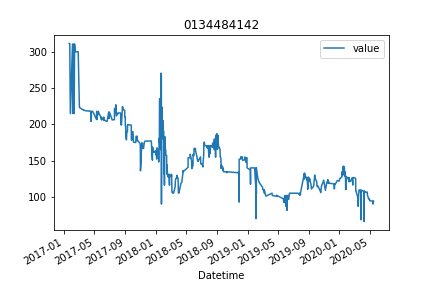

,mean,std,std/mean
Datetime,,,
2011,49.709535,12.369383,0.248833
2012,55.652174,14.166583,0.254556
2013,55.790793,16.835360,0.301759
2014,68.771629,22.906664,0.333083
2015,66.623080,14.639741,0.219740
2016,61.419215,17.007660,0.276911
2017,55.472144,25.558651,0.460747
2018,52.583945,36.358709,0.691441
2019,14.639358,7.773357,0.530990

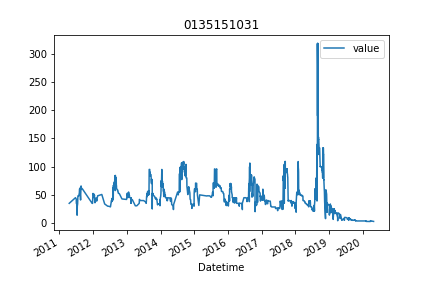

possibly seasonal


,mean,std,std/mean
Datetime,,,
2014,89.655503,17.269045,0.192616
2015,106.521376,12.765495,0.119840
2016,93.418000,17.621677,0.188633
2017,93.679572,17.996941,0.192112
2018,79.265929,12.577165,0.158671
2019,71.261888,11.228098,0.157561
2020,61.491415,8.245758,0.134096

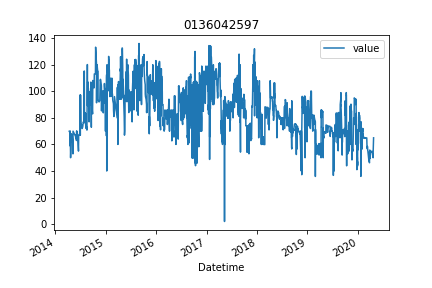

,mean,std,std/mean
Datetime,,,
2011,79.402222,21.296905,0.268215
2012,75.517500,12.824925,0.169827
2013,69.441176,9.539657,0.137378
2014,75.071250,16.918167,0.225361
2015,98.933214,17.051181,0.172350
2016,78.358519,15.873824,0.202579
2017,101.834128,29.710619,0.291755
2018,78.047909,23.719373,0.303908
2019,76.847665,18.067901,0.235113

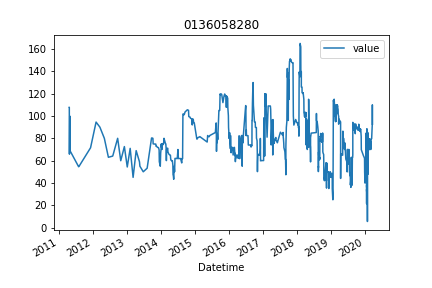

possibly seasonal


,mean,std,std/mean
Datetime,,,
2014,146.149024,7.409881,0.050701
2015,116.198324,13.203708,0.113631
2016,108.179228,22.603860,0.208948
2017,110.519788,11.127579,0.100684
2018,115.050095,23.487500,0.204150
2019,70.906716,22.240963,0.313665
2020,70.110889,23.703029,0.338079

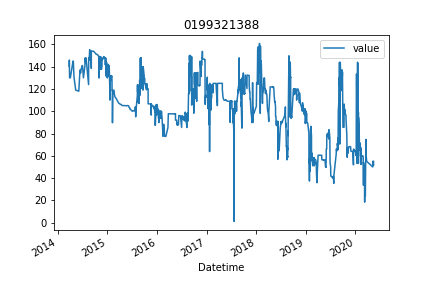

possibly seasonal


,mean,std,std/mean
Datetime,,,
2015,54.355535,8.268201,0.152113
2016,63.595296,11.067604,0.174032
2017,66.028689,15.478131,0.234415
2018,52.061546,11.814760,0.226938
2019,40.954338,10.399050,0.253918
2020,27.825388,6.854271,0.246332

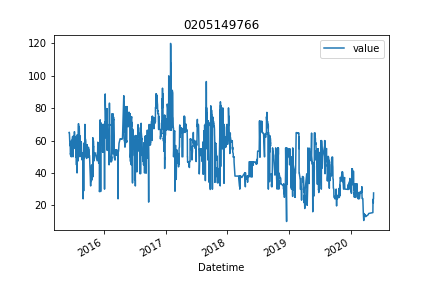

possibly seasonal


,mean,std,std/mean
Datetime,,,
2011,83.337838,14.740567,0.176877
2012,85.551750,8.443959,0.098700
2013,67.124861,10.868057,0.161908
2014,82.017200,25.710055,0.313472
2015,42.346702,18.544253,0.437915
2016,30.884294,11.952432,0.387007
2017,35.177355,12.405468,0.352655
2018,40.772779,12.864664,0.315521
2019,113.569305,41.626787,0.366532

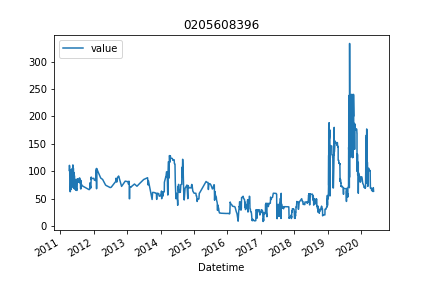

possibly seasonal


,mean,std,std/mean
Datetime,,,
2015,88.207591,19.189553,0.217550
2016,82.605426,12.650019,0.153138
2017,78.503393,12.508821,0.159341
2018,70.773358,9.609319,0.135776
2019,74.188266,14.441953,0.194666
2020,75.163550,15.611903,0.207706

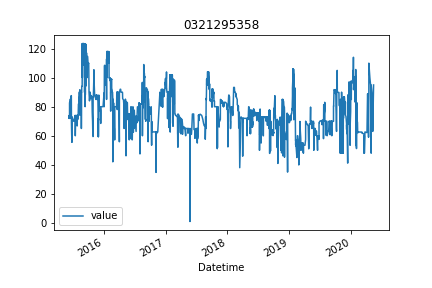

,mean,std,std/mean
Datetime,,,
2013,138.114390,16.780338,0.121496
2014,99.056000,37.495340,0.378527
2015,153.208086,27.420451,0.178975
2016,125.801977,35.276665,0.280414
2017,100.042320,22.289622,0.222802
2018,62.257210,31.557409,0.506888
2019,38.113804,6.150264,0.161366
2020,15.828898,2.262896,0.142960

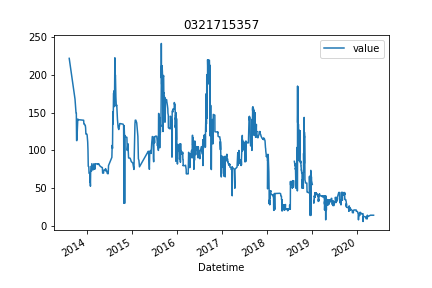

possibly seasonal


,mean,std,std/mean
Datetime,,,
2013,175.226538,16.865247,0.096248
2014,141.440372,23.102834,0.163340
2015,116.915158,18.048151,0.154370
2016,88.597108,20.468154,0.231025
2017,58.247695,16.627633,0.285464
2018,28.428023,9.676235,0.340377
2019,22.738723,8.499644,0.373796
2020,19.548415,4.159894,0.212800

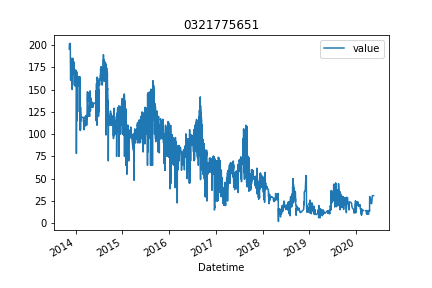

possibly seasonal


,mean,std,std/mean
Datetime,,,
2015,109.277235,20.507797,0.187668
2016,83.400118,32.162726,0.385644
2017,91.759857,34.072930,0.371327
2018,84.989220,29.116256,0.342588
2019,34.438062,12.117334,0.351859
2020,13.340968,6.775608,0.507880

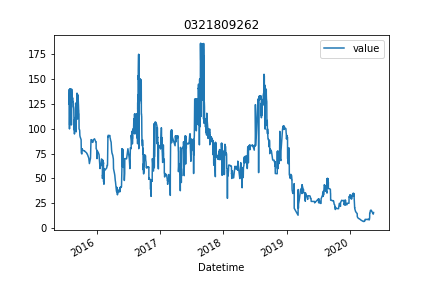

possibly seasonal


,mean,std,std/mean
Datetime,,,
2015,110.848571,28.143277,0.253889
2016,92.227367,11.147982,0.120875
2017,78.796852,14.905729,0.189167
2018,35.079812,15.685842,0.447147
2019,13.977612,5.326358,0.381063
2020,7.611037,4.055892,0.532896

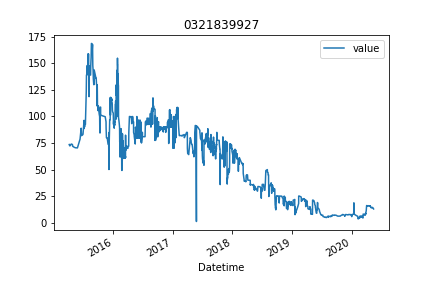

possibly seasonal


,mean,std,std/mean
Datetime,,,
2014,149.458280,21.890095,0.146463
2015,118.358011,12.884473,0.108860
2016,102.898650,12.692771,0.123352
2017,93.715501,14.898025,0.158971
2018,92.342616,21.143029,0.228963
2019,102.062349,23.012375,0.225474
2020,67.789830,10.433133,0.153904

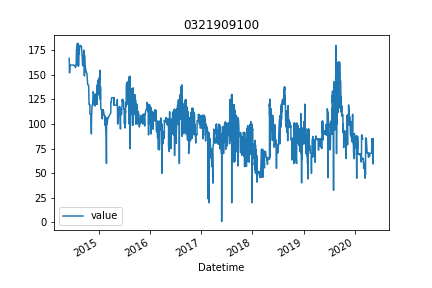

possibly seasonal


,mean,std,std/mean
Datetime,,,
2015,143.794840,21.546134,0.149839
2016,103.722560,20.719582,0.199760
2017,49.329493,16.034907,0.325057
2018,34.278552,9.437697,0.275324
2019,17.148526,8.408548,0.490336
2020,16.871208,4.511850,0.267429

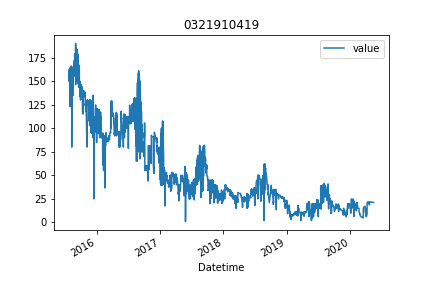

possibly seasonal


,mean,std,std/mean
Datetime,,,
2014,149.970000,0.042426,0.000283
2015,147.904459,21.247066,0.143654
2016,125.675030,28.817295,0.229300
2017,113.266516,25.865292,0.228358
2018,81.814526,16.947261,0.207142
2019,62.738914,11.367925,0.181194
2020,44.478831,6.717282,0.151022

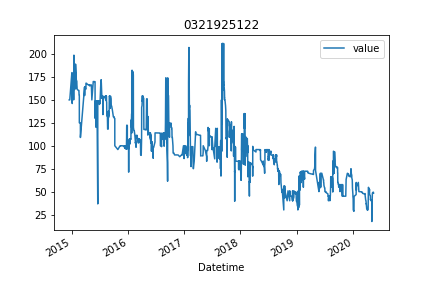

possibly seasonal


,mean,std,std/mean
Datetime,,,
2016,128.230733,17.547449,0.136843
2017,108.555202,21.609309,0.199063
2018,73.659003,20.569735,0.279256
2019,31.956644,10.833307,0.339000
2020,22.160039,7.780684,0.351113

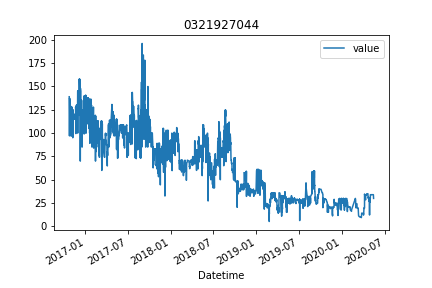

possibly seasonal


,mean,std,std/mean
Datetime,,,
2015,100.958387,10.855031,0.107520
2016,96.449679,14.762773,0.153062
2017,80.440111,14.286254,0.177601
2018,72.825889,15.653198,0.214940
2019,44.883519,12.867487,0.286686
2020,26.649868,7.471760,0.280368

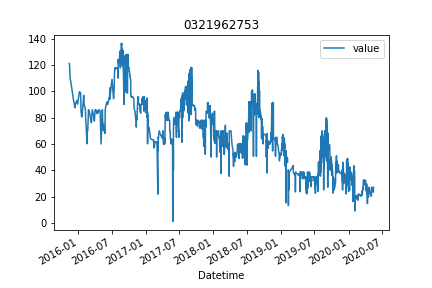

possibly seasonal


,mean,std,std/mean
Datetime,,,
2015,124.279157,18.538472,0.149168
2016,71.401159,17.359998,0.243133
2017,40.706622,13.169425,0.323520
2018,35.392678,12.986628,0.366930
2019,21.305996,6.591679,0.309381
2020,15.817324,1.871471,0.118318

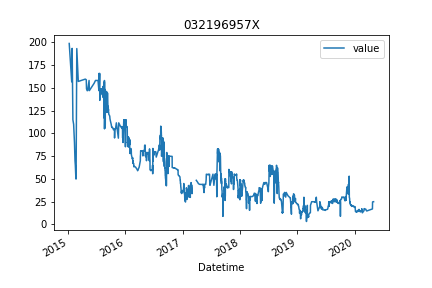

possibly seasonal


,mean,std,std/mean
Datetime,,,
2016,168.991280,30.156200,0.178448
2017,129.481972,22.899287,0.176853
2018,132.651411,28.282014,0.213206
2019,78.381399,37.020604,0.472314
2020,66.922000,10.273593,0.153516

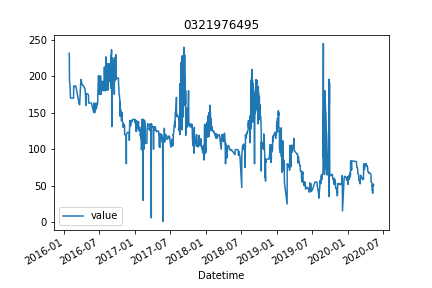

possibly seasonal


,mean,std,std/mean
Datetime,,,
2015,148.635525,16.555730,0.111385
2016,114.091442,12.847425,0.112606
2017,109.439148,20.378276,0.186206
2018,93.462570,15.449037,0.165297
2019,53.552949,11.115531,0.207562
2020,37.456453,8.403949,0.224366

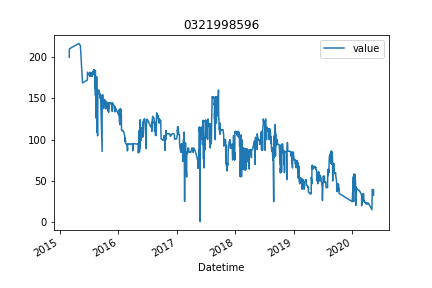

In [15]:
for asin,df in dict_df.items():
    df_stats = df.groupby(df.index.year).mean().rename(columns={'value':'mean'})
    df_stats = df_stats.join(df.groupby(df.index.year).std().rename(columns={'value':'std'}))
    df_stats['std/mean'] = df_stats['std']/df_stats['mean']
    bnn.display_side_by_side(df.plot(title=asin).get_figure(),df_stats) #,df_std)
    if np.mean(list(df_stats['std/mean'])[-4:-1])>.2:
        print('possibly seasonal')


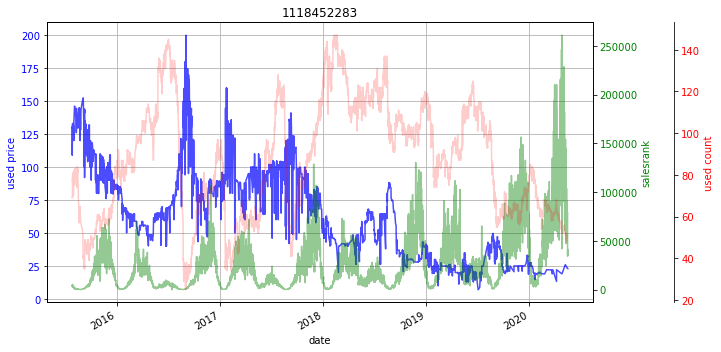

In [4]:
asin = asins[2]
df1 = bnn.get_usedprice([asin])[asin]['value']
df2 = bnn.get_salesrank([asin])[asin]['value']
df3 = bnn.get_usedcount([asin])[asin]['value']
f = bnn.plot_multiscale((df1,df2,df3),title=asin) #shows double unless you set variable=


,mean
Datetime,
2011,82.547143
2012,70.170360
2013,65.704503
2014,66.364767
2015,72.624185
2016,63.645259
2017,55.958807
2018,46.303349
2019,59.241014

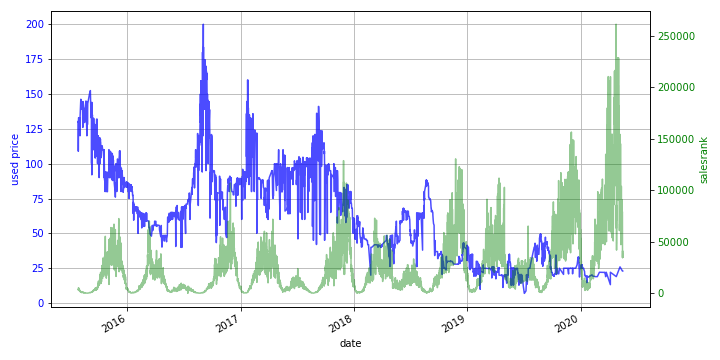

In [5]:

bnn.display_side_by_side(bnn.plot_multiscale((df1,df2)),df_mean,df_std)


2

In [7]:
a=(df1,df2,'asdf')
len(a)

3

In [8]:
# Find last 2 years Fall peak prices 
#df.groupby([df.index.year,df.index.month]).mean()

In [9]:
df.groupby(df.index.year).std()/df.groupby(df.index.year).mean()

,value
Datetime,
2011,0.119000
2012,0.245643
2013,0.196597
2014,0.185983
2015,0.173915
2016,0.275301
2017,0.374623
2018,0.339599
2019,0.314370


In [10]:
# find linear trend

from sklearn.linear_model import LinearRegression
reg_up = LinearRegression().fit(t_up,up.mean(axis=1))
df = up.subtract(reg_up.predict(t_up),axis=0)

print('Average used price percent change yearly: ')
print(reg_up.coef_*10**9*60*60*24*365*100) # reg_coef_ is in units of nanoseconds. Convert to years.
#print(reg.intercept_)

NameError: name 't_up' is not defined

In [ ]:
asins

True